In [1]:
!nvidia-smi

Tue Jul  2 17:16:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 9.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
!yolo predict model=yolov8n.pt source="https://ultralytics.com/images/bus.jpg"

100% 6.25M/6.25M [00:00<00:00, 154MB/s]
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 476k/476k [00:00<00:00, 27.8MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 89.3ms
Speed: 14.6ms preprocess, 89.3ms inference, 770.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [4]:
from ultralytics import YOLO

In [5]:
!unzip '/content/data.zip'

Archive:  /content/data.zip
   creating: data/
  inflating: data/data.yaml          
   creating: data/test/
   creating: data/test/images/
  inflating: data/test/images/1.jpeg  
  inflating: data/test/images/10.jpeg  
  inflating: data/test/images/11.jpeg  
  inflating: data/test/images/12.jpeg  
  inflating: data/test/images/13.jpeg  
  inflating: data/test/images/14(1).jpeg  
  inflating: data/test/images/14.jpg  
  inflating: data/test/images/15.jpeg  
  inflating: data/test/images/16.jpeg  
  inflating: data/test/images/17.jpeg  
  inflating: data/test/images/18.jpeg  
  inflating: data/test/images/19.jpeg  
  inflating: data/test/images/2.jpeg  
  inflating: data/test/images/20.jpeg  
  inflating: data/test/images/21.jpeg  
  inflating: data/test/images/22.jpeg  
  inflating: data/test/images/23.jpeg  
  inflating: data/test/images/24.jpeg  
  inflating: data/test/images/25.jpeg  
  inflating: data/test/images/26.jpeg  
  inflating: data/test/images/27.jpeg  
  inflating: data/te

In [6]:
from IPython import display

In [7]:
!ls

bus.jpg  data  data.zip  runs  sample_data  yolov8n.pt


In [9]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=224 plots=True

100% 21.5M/21.5M [00:00<00:00, 286MB/s]
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [10]:
!ls runs/detect/train/

args.yaml					     P_curve.png	 train_batch121.jpg
confusion_matrix_normalized.png			     PR_curve.png	 train_batch122.jpg
confusion_matrix.png				     R_curve.png	 train_batch1.jpg
events.out.tfevents.1719942989.0f1099bb1d4c.11135.0  results.csv	 train_batch2.jpg
F1_curve.png					     results.png	 val_batch0_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg	 val_batch0_pred.jpg
labels.jpg					     train_batch120.jpg  weights


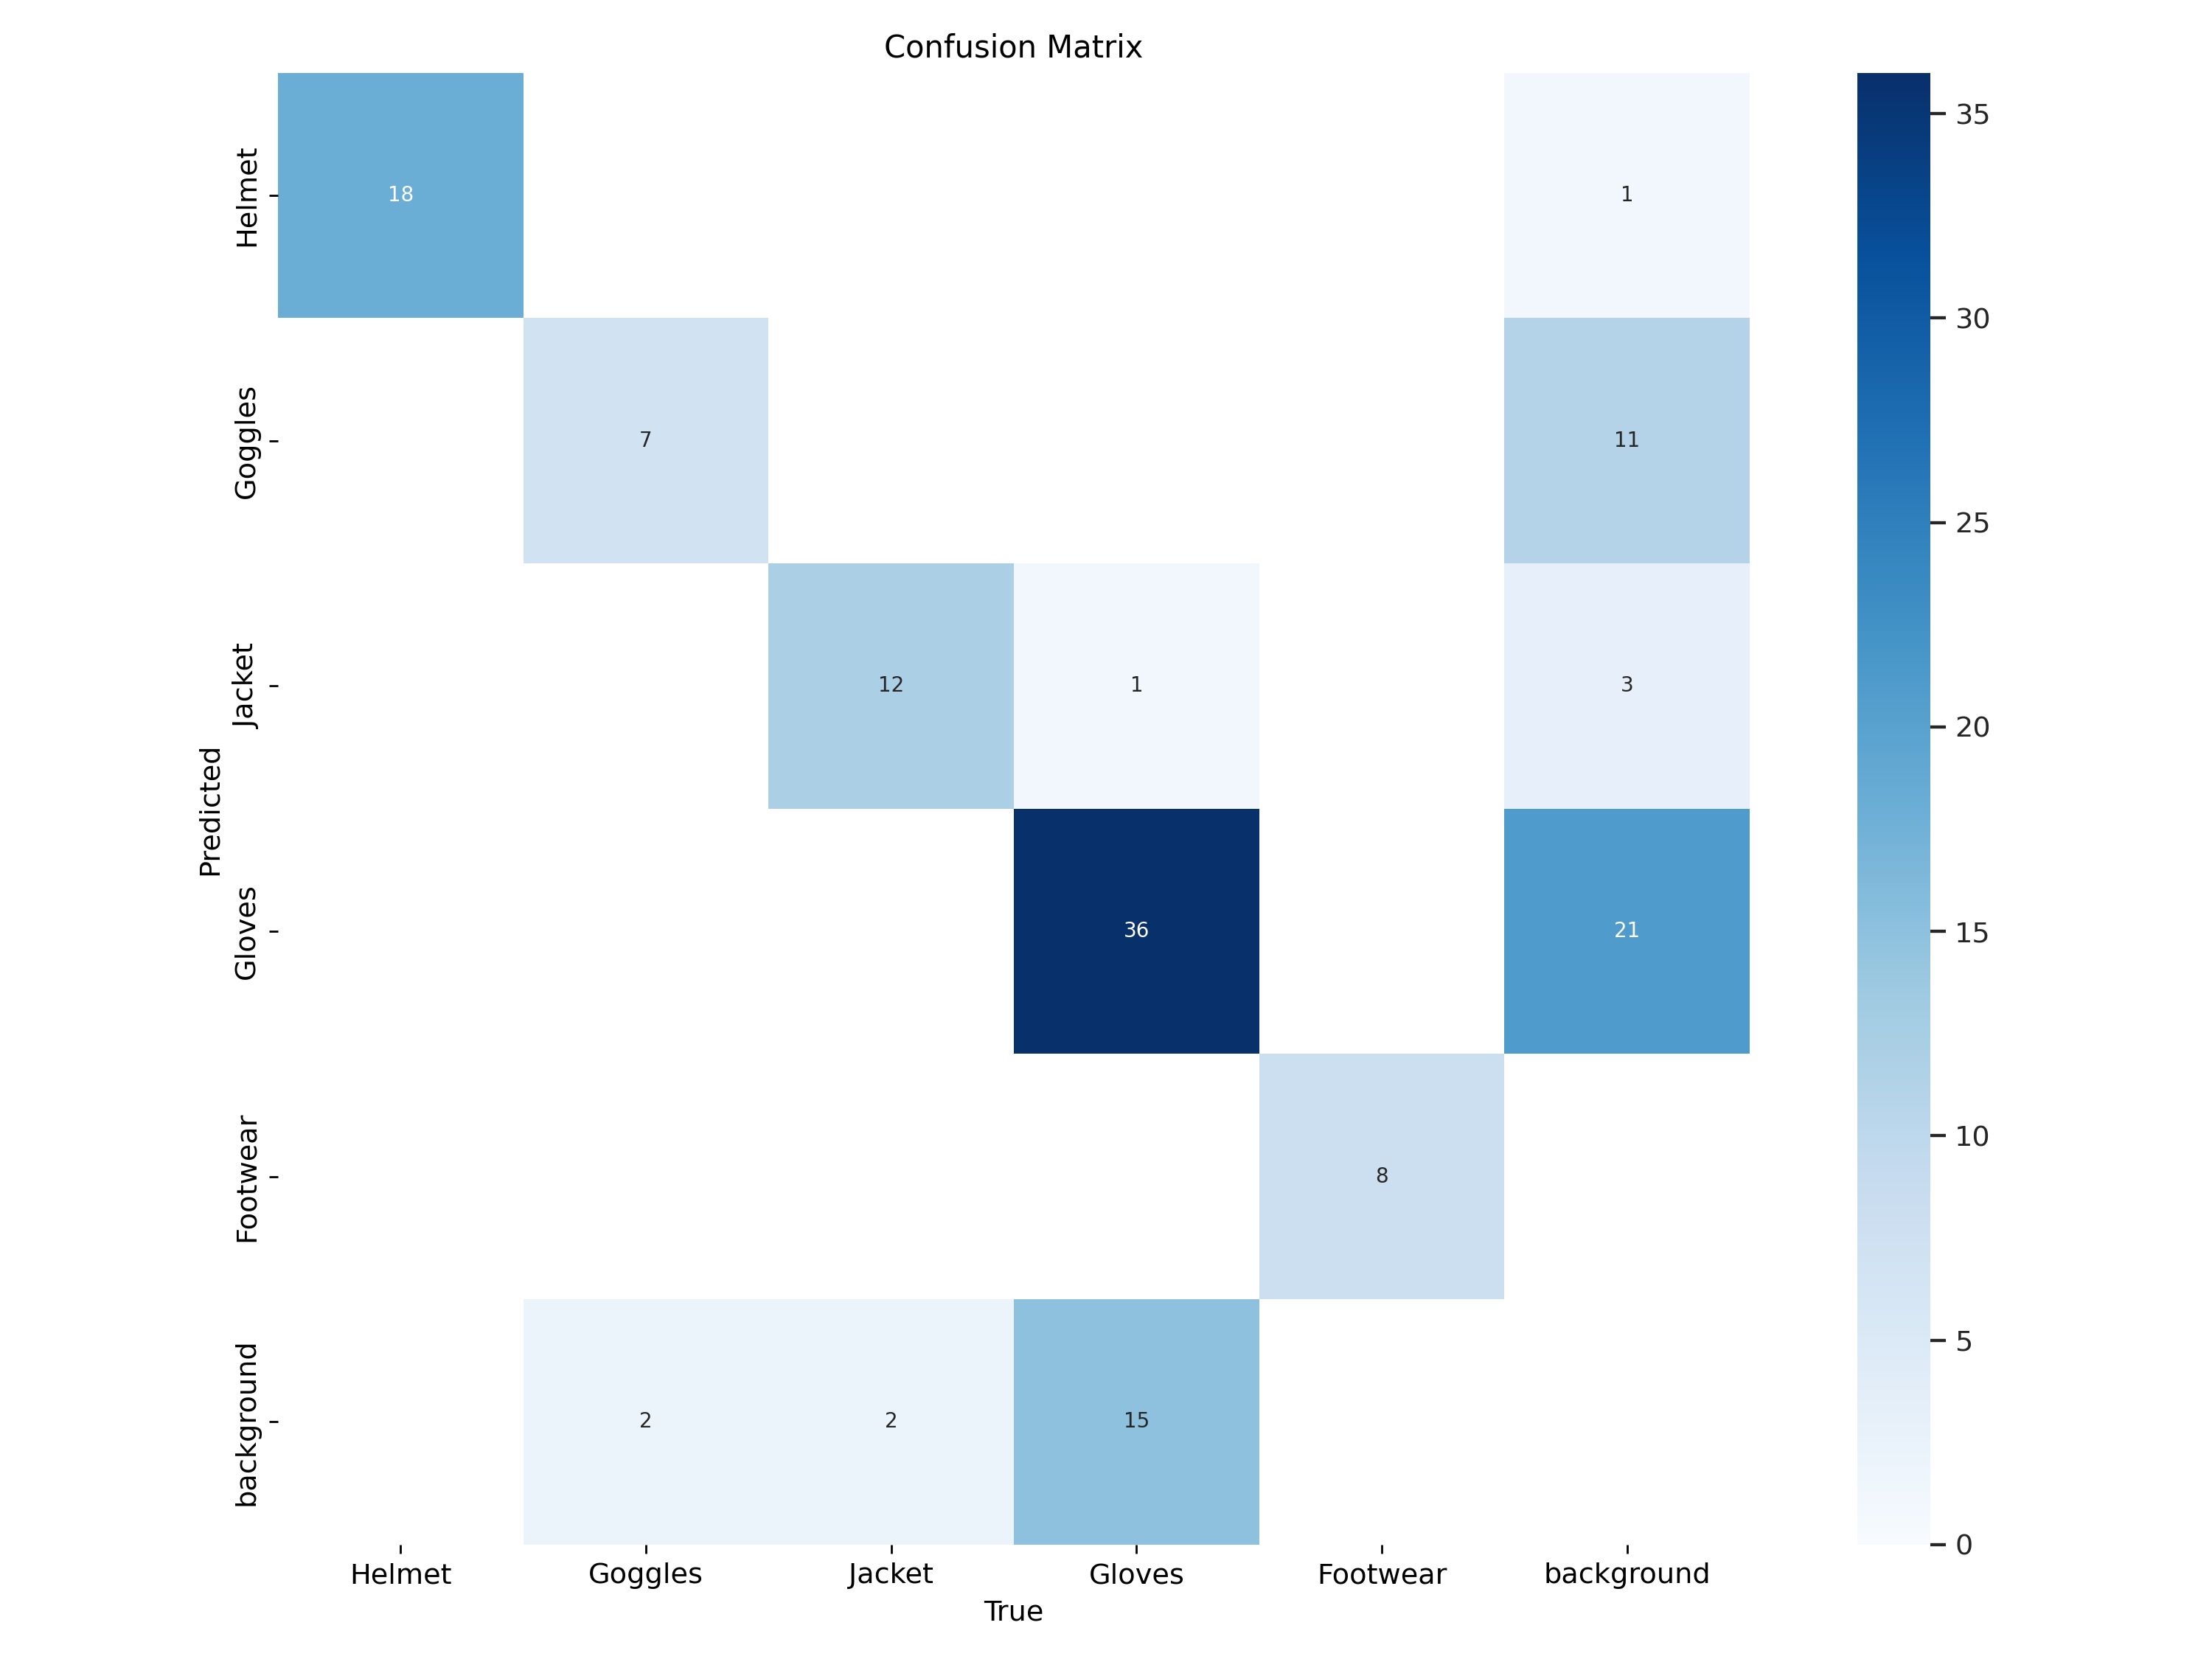

In [15]:
from PIL import Image
image_path= '/content/runs/detect/train/confusion_matrix.png'
display.Image(image_path)

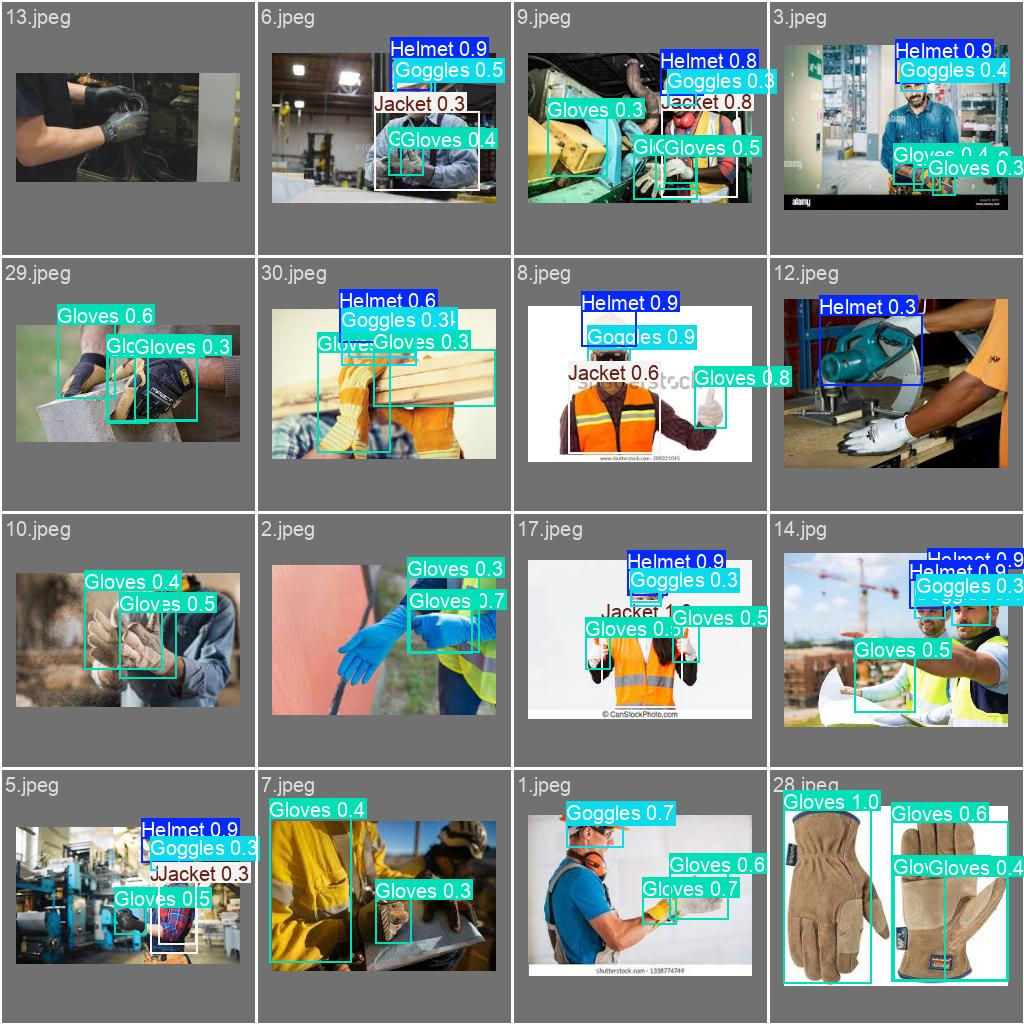

In [16]:
img_path= "/content/runs/detect/train/val_batch0_pred.jpg"
display.Image(img_path)

In [18]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source="/content/data/test/images"

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/31 /content/data/test/images/1.jpeg: 192x224 1 Goggles, 2 Glovess, 117.0ms
image 2/31 /content/data/test/images/10.jpeg: 160x224 2 Glovess, 69.7ms
image 3/31 /content/data/test/images/11.jpeg: 224x224 4 Glovess, 8.2ms
image 4/31 /content/data/test/images/12.jpeg: 192x224 (no detections), 7.7ms
image 5/31 /content/data/test/images/13.jpeg: 128x224 (no detections), 66.7ms
image 6/31 /content/data/test/images/14(1).jpeg: 224x224 1 Jacket, 7.9ms
image 7/31 /content/data/test/images/14.jpg: 192x224 2 Helmets, 2 Goggless, 1 Gloves, 8.0ms
image 8/31 /content/data/test/images/15.jpeg: 224x224 3 Glovess, 7.6ms
image 9/31 /content/data/test/images/16.jpeg: 224x160 1 Helmet, 1 Goggles, 1 Jacket, 1 Gloves, 77.0ms
image 10/31 /content/data/test/images/17.jpeg: 160x224 1 Helmet, 1 Goggles, 1 Jacket, 2 Glovess, 7.6ms
image 11/

In [19]:
import glob

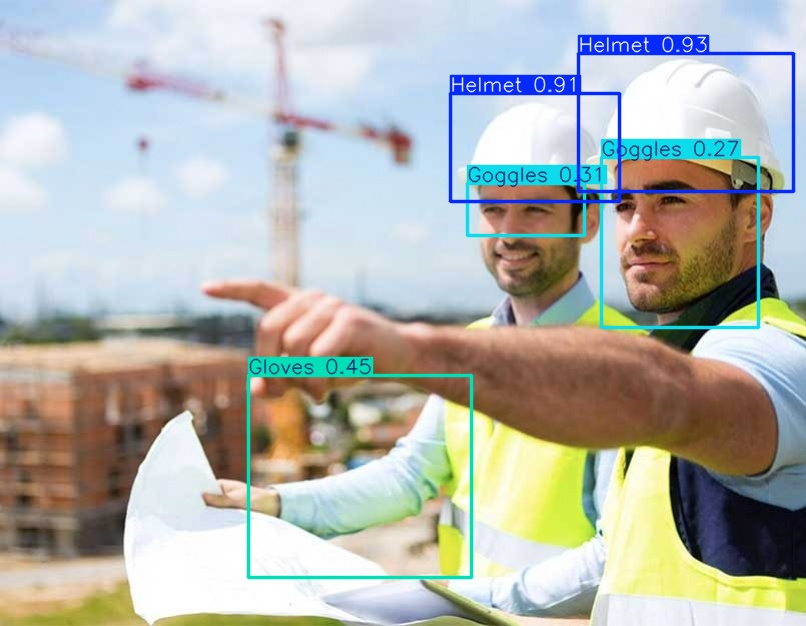

In [24]:
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict2/*.jpg')[:1]:
  display(Image(image_path, width= 600))
  print("\n")